<a href="https://colab.research.google.com/github/Smartsie/Invest/blob/master/Invest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install investpy==0.9.14

     |████████████████████████████████| 4.4MB 2.7MB/s 
     |████████████████████████████████| 245kB 28.2MB/s 
     |████████████████████████████████| 5.5MB 24.1MB/s 
  Created wheel for investpy: filename=investpy-0.9.14-cp36-none-any.whl size=4469457 sha256=9dbc615c0f26a53835422b7be6cb0aaed902a3e27408add72836963820f46027
  Stored in directory: /root/.cache/pip/wheels/86/35/ee/fc38f22f1353037b5118cff64b62aeed42f63f2c84135eaaaa
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:

ING (B) Collect Portfolio - ING Core Fund Balanced - Euro
BE6247121302
Risk 4

ING (B) Collect Portfolio - ING Core Fund Moderated - Euro
BE6282431327
Risk 3


ING (B) Collect Portfolio - ING Core Fund Dynamic - Euro
BE6282433349
Risk 5

ING (B) Collect Portfolio - ING Stability Fund - Euro
BE6288613068
Risk 2

ING (B) Fund - Index Portfolio Fund Moderated - Euro
BE6264506526
Risk 3
ING (B) Fund - Index Portfolio Fund Dynamic - Euro
BE6264508548
Risk 5

ING Fund - ING Sustainable Conservative - Euro
Risk 3
LU1860911087


ING Fund - ING Sustainable Moderate - Euro
LU1860911913
Risk 3

ING Fund - ING Sustainable Balanced - Euro
LU1860912721


ING Fund - ING Sustainable Active - Euro
LU2075804901
Risk 5

ING Fund - ING Sustainable Dynamic - Euro
LU1860913703
Risk 5

ING Fund - ING Multi-Asset Income Fund Moderate - Euro
LU1857284985
Risk 4

ING Fund - ING Multi-Asset Income Fund Balanced - Euro
LU1857284985
Risk 4

ING Fund - ING Multi-Asset Income Fund Active - Euro
LU1857284985
Risk 4

AXA World Funds - Global Optimal Income - Euro
LU0465917044
Risk 5

NN (L) Patrimonial - Balanced - Euro
LU0119195963
Risk 4




SyntaxError: ignored

In [4]:
import investpy

funds_list=['BE6247121302',
'BE6282431327',
'BE6282433349',
'BE6288613068',
'BE6264506526',
'BE6264508548',
'LU1860911087',
'LU1860911913',
'LU1860912721',
'LU2075804901',
'LU1860913703',
'LU1857284985',
'LU1857284985',
'LU1857284985',
'LU0465917044',
'LU0119195963'
]



In [5]:
funds_df = investpy.get_funds(country=None)
funds_dict = investpy.get_funds_dict(country=None)

In [6]:
def search(isin, funds):
    fund=[element for element in funds if element['isin'] == isin]
    fund=fund[0]
    return fund['name'],fund['country']

BE6247121302  found
BE6282431327  not found
BE6282433349  not found
BE6288613068  not found
BE6264506526  not found
BE6264508548  not found
LU1860911087  not found
LU1860911913  not found
LU1860912721  not found
LU2075804901  not found
LU1860913703  not found
LU1857284985  not found
LU1857284985  not found
LU1857284985  not found
LU0465917044  found
LU0119195963  found


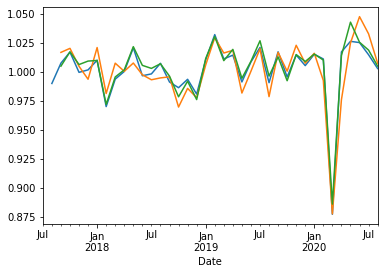

In [99]:
fonds=[]
for isin in funds_list:
  try:
    fund_name,fund_country=search(isin,funds_dict)
    df = investpy.get_fund_historical_data(fund=fund_name, country=fund_country, from_date='01/01/2000', to_date='09/08/2020')
    # Resample by week.
    df=df.resample('M').mean()
    # Calculate the ratio 
    df['Variation']=df['Close']/(df['Close'].shift(1))
    mean_=df['Variation'].mean()
    std_=df['Variation'].std()
    fonds.append([isin,mean_,std_])
    print(isin,' found')
    df.Variation.plot()
  except:
    print(isin,' not found')
fonds=pd.DataFrame(fonds,columns=['isin','mean','std'])

In [100]:
fonds

,isin,mean,std
0,BE6247121302,1.001865,0.025060
1,LU0465917044,1.001198,0.027710
2,LU0119195963,1.003983,0.024979


In [101]:
# BE6247121302 ING CP CFB C
#   0P0000XZ4E Historical Data.csv
#   Mean return:  1.0266246831647217
#   Return Deviation 0.05830390458402494
# LU0119195963 NN L Pat Bal PC
#   0P00000BFP Historische Data.csv
#   Mean return:  1.0386802046259886
#   Return Deviation 0.05287636012575688

In [102]:
def generate_interest(interest,variation, month):
  x=np.random.normal(interest, variation,month)
  return np.cumprod(x)

In [103]:
Cash=10000
interet=fonds['mean']
variation_interet_par_mois=fonds['std']

In [138]:
# What is best combination of portfolio which will minimize risk and maximize profit
experiments=1000
a=np.random.random(experiments)
b=np.random.random(experiments)
c=np.random.random(experiments)
d=a+b+c
a=a/d*Cash*0.97 #3% de frais d'entrée...
b=b/d*Cash*0.97 #3% de frais d'entrée...
c=c/d*Cash*0.97 #3% de frais d'entrée...

In [139]:
evaluation_period

240

In [ ]:
N=experiments
evaluation_period=120*2
# if sampling is W, then evaluation_period=10*52=520
# is samplinf is M, then evaluation_period=10*12=120
# if sampling is 2W, then evaluation_period=10*52/2=260
z=[]
for C1,C2,C3 in zip(a,b,c):
  perc=[]
  for j in range(0,N):
    trace_a=np.multiply(C1,generate_interest(interet[0],variation_interet_par_mois[0],evaluation_period))
    trace_b=np.multiply(C2,generate_interest(interet[1],variation_interet_par_mois[1],evaluation_period))
    trace_c=np.multiply(C3,generate_interest(interet[2],variation_interet_par_mois[2],evaluation_period))
    total=trace_a+trace_b+trace_c
    plt.plot(total, color='blue',alpha=0.01)
    perc.append(total[-1])
  z.append([C1,C2,C3,np.percentile(perc,50),np.percentile(perc,10),np.percentile(perc,90)])
plt.show()

In [ ]:
# Which is a and b which gives the highest min value for confidence interval?
df=pd.DataFrame(z,columns=['a','b','c','median','low','high'])

In [ ]:
plt.scatter(df['a'],df['median'],color="red",alpha=0.5)
plt.fill_between(df['a'],df['low'],df['high'],color="blue",alpha=0.1)

In [ ]:
px.scatter(df,x='low',y='high',color="high",hover_data=["a", "b","c"])

In [ ]:
df['sum all']=(df['median']+df['low']+df['high'])/3
#df['sum all2']=(df['median']**2+df['low']**2+df['high']**2)
best=np.argmax(df['sum all'])
print(df.iloc[best])


In [ ]:
median=df.iloc[best][['high','median','low']]
frais=median*0.0175*10 # frais de gestion de 1.75% par an
inflation=1.02**10 #2% inflation par an 


In [ ]:
benef=(median-Cash/inflation-frais)*0.7 # Retirer 30% de frais sur la plus value
print("Benef=")
print(benef)

In [ ]:
print(benef/Cash)

In [92]:
px.scatter_3d(df,x='low',y='median',z="high",color="a",hover_data=["a", "b","c","sum all"])